In [1]:
%matplotlib inline

In [2]:
import itertools

In [3]:
import matplotlib; matplotlib.__version__

'3.5.1'

In [77]:
import matplotlib.pyplot as plt
import matplotlib.axes as maxes
import matplotlib.colors as mcolors
import matplotlib.patheffects as path_effects

import numpy as np


In [78]:
N = 6
data = np.arange(N).reshape(2,3)

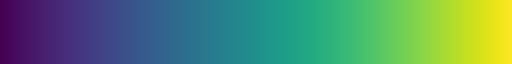

In [79]:
cmap = plt.get_cmap('viridis')
cmap

In [80]:
scaled = 2 
norm = mcolors.BoundaryNorm(np.arange(N*scaled), cmap.N)

In [81]:
norm.boundaries

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

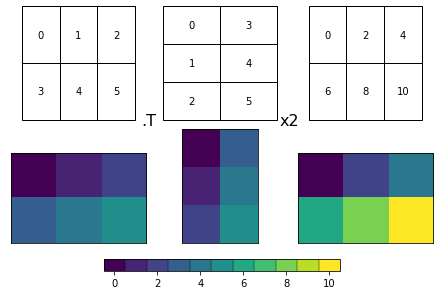

In [82]:
fig, axd = plt.subplot_mosaic([['ti', 'tr', 'ts'], ['mi', 'mr', 'ms']], constrained_layout=True )
def make_set(ax_t, ax_m, data):
    axd[ax_t].table(data, cellLoc='center', bbox= [0,0, 1,1])
    axd[ax_t].set_aspect("equal")
    axd[ax_t].axis('off')
    mi = axd[ax_m].matshow(data, cmap=cmap, norm=norm)
    axd[ax_m].set(xticks=[], yticks=[])
    return mi
    
mi = make_set('ti', 'mi', data)
mr = make_set('tr', 'mr', data.T)
ms = make_set('ts', 'ms', data*scaled)

cb = fig.colorbar(mi, ax=list(axd.values()), values = np.arange(N*scaled-1), 
                      orientation='horizontal', drawedges=True, fraction=.05)
fig.text(1.05, -.05, '.T', fontsize=16, transform=axd['ti'].transData)
fig.text(1.025, -.05, 'x2', fontsize=16, transform=axd['tr'].transData)
fig.savefig('../figures/equivariance_all.png')

In [110]:
def make_set(ax_t, data, alpha=.25, color_cells=False):
    tab = axd[ax_t].table(data, cellLoc='center', bbox= [0, 0, 1, 1])
    nrows, ncols = data.shape
    for (r,c) in itertools.product(range(nrows), range(ncols)):
        tab[(r,c)].set_alpha(alpha=alpha)
        tab[(r,c)].set_edgecolor('black')
        text = tab[(r,c)].get_text()
        text.set(fontsize=14, ha='center', va='center')
        if color_cells:
            tab[(r,c)].set_color(cmap(norm(data[r,c])))
            text.set_color('white')
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                   path_effects.Normal()])
            
        
    axd[ax_t].set_aspect("equal")
    axd[ax_t].axis('off')

In [111]:
tc = {'ti': 'data', 'tr':'data.T', 'ts':f'data*{scaled}', 'trs':f'data.T*{scaled}'}

tp = {'ti': r'$\tau$',
      'tr': r'$\hat\phi_{E}^*\tau$',
      'ts': r'$\widetilde\phi_{E}\tau$',
      'trs': r'$\phi_{E}\tau$'
     }
tr = {'ti': r'$\rho$',
      'tr': r'$\hat\phi_{H}^*\rho$',
      'ts': r'$\widetilde\phi_{H}\rho$',
      'trs': r'$\phi_{H}\rho$'
     }
te = {k: tp[k] +' = '+ tc[k] for k in tc}
to = {k: f'A({tp[k]})'+' = ' + tr[k] for k in tp}
dt = {'ti':data, 'tr':data.T, 'ts': data*scaled, 'trs':data.T*scaled}

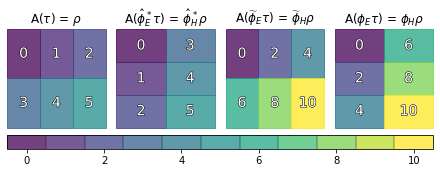

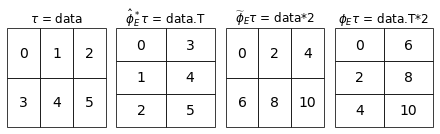

In [112]:
alpha = .75
for titles, color_cells,  fname in [(to, True, 'equivariance'), (te, False, 'phi')]:
    fig, axd = plt.subplot_mosaic([['ti','tr', 'ts', 'trs']], constrained_layout=True, 
                                  gridspec_kw={'wspace':.1})
    for axn in axd:
        make_set(axn, dt[axn], color_cells=color_cells, alpha=alpha)
        axd[axn].set_title(titles[axn])
    
    if color_cells:
        cax = fig.colorbar(None, ax=list(axd.values()), cmap=cmap, norm=norm, alpha=alpha, 
                 values = np.arange(N*scaled-1), aspect=30, drawedges=True, pad=0.025,
                          orientation='horizontal')

    fig.savefig(f'../figures/{fname}.png', dpi=500, bbox_inches='tight')